# Logistic Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Classification/Data.csv')
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### Looking for missing data

Missing Values

In [4]:
df.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

Empty Strings

In [5]:
[(df[col] == '').sum() for col in df.columns]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

### Exploring uniques values

In [6]:
for col in df.columns:
  print(col + ':', len(df[col].unique()))

Sample code number: 630
Clump Thickness: 10
Uniformity of Cell Size: 10
Uniformity of Cell Shape: 10
Marginal Adhesion: 10
Single Epithelial Cell Size: 10
Bare Nuclei: 10
Bland Chromatin: 10
Normal Nucleoli: 10
Mitoses: 9
Class: 2


Dropping 'Sample code number' as there are two many unique values

In [7]:
df = df.drop('Sample code number', axis=1)
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [8]:
# Remove the target column 'Class'
X = df.iloc[:, -1].values
print(X.shape)

# Keep the target column 'Class'
y = df.iloc[:, -1].values
print(y.shape)

(683,)
(683,)


## Visualizing Columns Values

The bar plot helper function takes a column as argument.
It then return the total count of each unique value in the column
And also convert those uniques values to string so they can be used a label for the x axis. 

In [9]:
def bar_plot_helper(col_name):
  col_values = df[col_name]

  # names for the plot
  names = [str(value) for value in col_values.unique()]

  col_counts = []
  # Counts of clump thickness by values
  for col in col_values.unique():
    col_counts.append(
        col_values[col_values == col].count()
        )
    
  return (names, col_counts)

In [10]:
arr_names = []
arr_values = []
for col in df.columns:
  names, values = bar_plot_helper(col)
  arr_names.append(names)
  arr_values.append(values)

Text(0.5, 1.0, 'Mitoses')

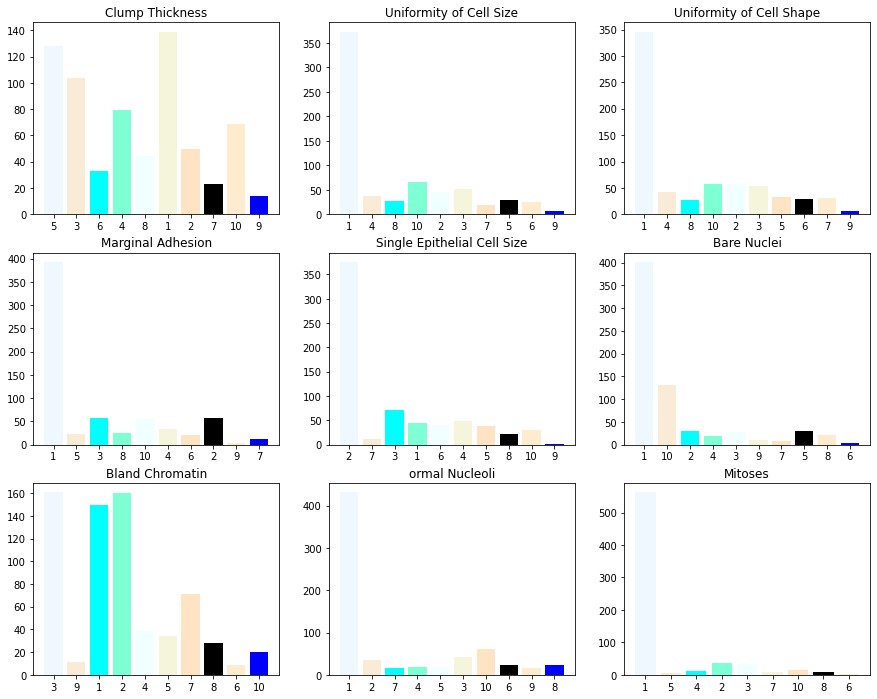

In [11]:
plt.figure(figsize=(15, 12))

hex_colors = []
import matplotlib.colors as mcolors
for name, hex in mcolors.cnames.items():
    hex_colors.append(hex)

plt.subplot(331)
plt.bar(x=arr_names[0], height=arr_values[0], color=hex_colors)
plt.title('Clump Thickness')

plt.subplot(332)
plt.bar(x=arr_names[1], height=arr_values[1], color=hex_colors)
plt.title('Uniformity of Cell Size')

plt.subplot(333)
plt.bar(x=arr_names[2], height=arr_values[2], color=hex_colors)
plt.title('Uniformity of Cell Shape')

# ------------------------------------
plt.subplot(334)
plt.bar(x=arr_names[3], height=arr_values[3], color=hex_colors)
plt.title('Marginal Adhesion')

plt.subplot(335)
plt.bar(x=arr_names[4], height=arr_values[4], color=hex_colors)
plt.title('Single Epithelial Cell Size')

plt.subplot(336)
plt.bar(x=arr_names[5], height=arr_values[5], color=hex_colors)
plt.title('Bare Nuclei')

# ------------------------------------
plt.subplot(337)
plt.bar(x=arr_names[6], height=arr_values[6], color=hex_colors)
plt.title('Bland Chromatin')

plt.subplot(338)
plt.bar(x=arr_names[7], height=arr_values[7], color=hex_colors)
plt.title('ormal Nucleoli')

plt.subplot(339)
plt.bar(x=arr_names[8], height=arr_values[8], color=hex_colors)
plt.title('Mitoses')

Text(0, 0.5, 'Count of Values')

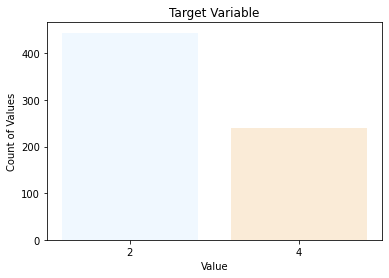

In [12]:
class_names, class_values = bar_plot_helper('Class')

plt.bar(x=class_names, height=class_values, color=hex_colors)
plt.title('Target Variable')
plt.xlabel('Value')
plt.ylabel('Count of Values')

# TODO: 65% of benign -> arrow pointing
# class_values[0] / (class_values[0] + class_values[1])

## Splitting the dataset into the Training set and Test set

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [14]:
X_test

array([2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 2,
       4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2,
       4, 2, 4, 2, 4, 4, 4, 2, 4, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2,
       4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2,
       4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 4, 4, 2, 2,
       2, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2])

## Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform([X_train])
X_test = sc.transform(X_test)

ValueError: ignored

## Training the Logistic Regression model on the Training set

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

In [ ]:
patient = [dataset.iloc[682, 1:-1].values]

y_pred = classifier.predict(patient)
print(y_pred)

In [ ]:
dataset